In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Часть 1

Ссылка на датасет: https://www.kaggle.com/datasets/budincsevity/szeged-weather

Выбранный датасет представляет собой набор данных о погоде в городе Szeged (Венгрия) с 2006 по 20016 год и включает следующие столбцы:

* Formatted Date - содержит отформатированную дату и время в формате "год-месяц-день час:минута:секунда.миллисекунда + смещение по времени". Например, "2006-04-01 00:00:00.000 +0200".

* Summary - содержит краткое описание погодных условий в тот момент времени, например, "Partly Cloudy" или "Mostly Cloudy".

* Precip Type - указывает тип осадков в тот момент времени, например, "rain".

* Temperature (C) - содержит температуру в градусах Цельсия.

* Apparent Temperature (C) - содержит ощущаемую температуру в градусах Цельсия.

* Humidity - содержит относительную влажность в процентах.

* Wind Speed (km/h) - содержит скорость ветра в км/ч.

* Wind Bearing (degrees) - содержит направление ветра в градусах.

* Visibility (km) - содержит видимость в км.

* Pressure (millibars) - содержит атмосферное давление в миллибарах.

* Daily Summary - содержит краткое описание погодных условий на протяжении дня, например, "Partly cloudy throughout the day".

Загрузка датасета

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')
df.drop('Loud Cover', axis=1, inplace=True)
df.set_index('Formatted Date', inplace=True)

In [ ]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.


Информация о датафрейме и его столбцах

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
dtypes: float64(7), object(3)
memory usage: 8.1+ MB


Выделение целевой переменной (температуры) и признаков

In [ ]:
features = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
target = df['Temperature (C)']

Разделение данных на тренировочный и тестовый наборы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Стандартизация данных

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Создание нейронной сети

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

Ниже представлена краткая информация о структуре нейронной сети, выведенная с помощью метода `summary()`

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Краткое описание:

  * "sequential_2": Название модели.
  * "Layer (type)": Каждый слой в модели с его типом (Dense - полносвязный).
  * "Output Shape": Форма вывода каждого слоя.
  * "Param #": Количество обучаемых параметров в каждом слое.
  * "Total params": Общее количество обучаемых параметров в модели.
  * "Trainable params": Количество параметров, которые подлежат обучению.
  * "Non-trainable params": Количество параметров, которые не подлежат обучению (например, параметры BatchNormalization).

  Количество параметров = `(X_train.shape[1] + 1 (смещение)) * n_нейронов`

Компиляция модели

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Обучение модели на 20 поколениях и с использованием размера батча - 256 (установлено эмпирическим путем).

In [ ]:
history  = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/20
302/302 [==============================] - 4s 9ms/step - loss: 92.1091 - mae: 7.4308 - val_loss: 50.5287 - val_mae: 5.6747
Epoch 2/20
302/302 [==============================] - 3s 9ms/step - loss: 47.2605 - mae: 5.5040 - val_loss: 46.7192 - val_mae: 5.4727
Epoch 3/20
302/302 [==============================] - 3s 9ms/step - loss: 45.3194 - mae: 5.4000 - val_loss: 45.8825 - val_mae: 5.4134
Epoch 4/20
302/302 [==============================] - 2s 6ms/step - loss: 44.5711 - mae: 5.3570 - val_loss: 45.1478 - val_mae: 5.3784
Epoch 5/20
302/302 [==============================] - 1s 4ms/step - loss: 43.6311 - mae: 5.2975 - val_loss: 43.8140 - val_mae: 5.2770
Epoch 6/20
302/302 [==============================] - 2s 5ms/step - loss: 41.9065 - mae: 5.1916 - val_loss: 41.5771 - val_mae: 5.1408
Epoch 7/20
302/302 [==============================] - 2s 5ms/step - loss: 39.6130 - mae: 5.0452 - val_loss: 39.5631 - val_mae: 5.0695
Epoch 8/20
302/302 [==============================] - 2s 6ms/s

Выполнение предсказания

In [ ]:
prediction = model.predict(X_test)

603/603 [==============================] - 1s 1ms/step


Создание датафрейма с истинными и предсказанными значениями

In [ ]:
result_df = pd.DataFrame({'True_Temperature': y_test, 'Predicted_Temperature': prediction.flatten()})

In [ ]:
result_df

,True_Temperature,Predicted_Temperature
Formatted Date,,
2015-09-19 17:00:00.000 +0200,28.122222,19.689350
2009-11-29 14:00:00.000 +0100,10.000000,6.993504
2006-11-18 16:00:00.000 +0100,14.400000,12.688801
2010-02-10 20:00:00.000 +0100,1.016667,7.828851
2006-01-14 16:00:00.000 +0100,-0.122222,-3.935490
...,...,...
2016-11-12 13:00:00.000 +0100,9.183333,9.195513
2012-07-04 03:00:00.000 +0200,17.894444,18.755527
2007-04-20 08:00:00.000 +0200,10.716667,20.350664


Построение графика истинных и предсказанных значений

Text(0, 0.5, 'Предсказанные значения')

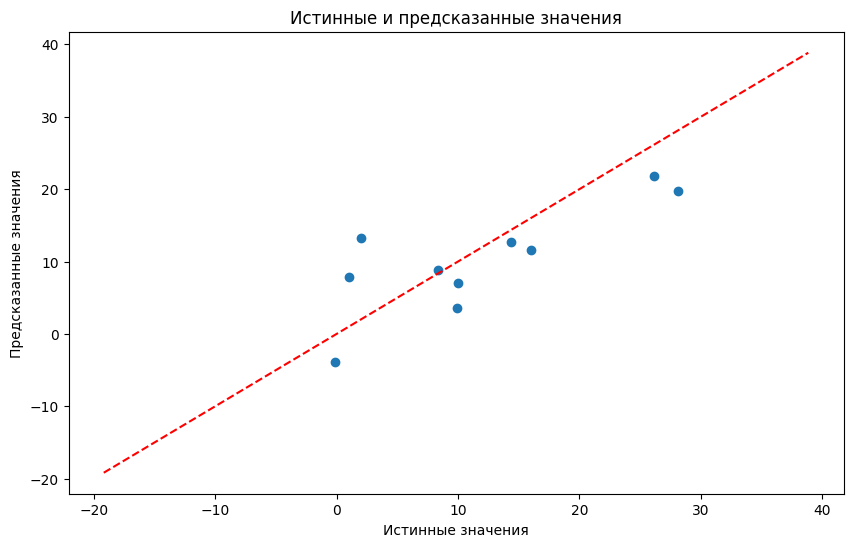

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(result_df['True_Temperature'][:10], result_df['Predicted_Temperature'][:10])
plt.plot([min(result_df['True_Temperature']), max(result_df['True_Temperature'])],
         [min(result_df['True_Temperature']), max(result_df['True_Temperature'])],
         color='red', linestyle='--', label='Линия идеального совпадения')
plt.title('Истинные и предсказанные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

На основе полученного графика можно сделать вывод что нейронная сеть достаточно точно предсказывает погоду.

Построение графика средней абсолютной ошибки и потерь по эпохам

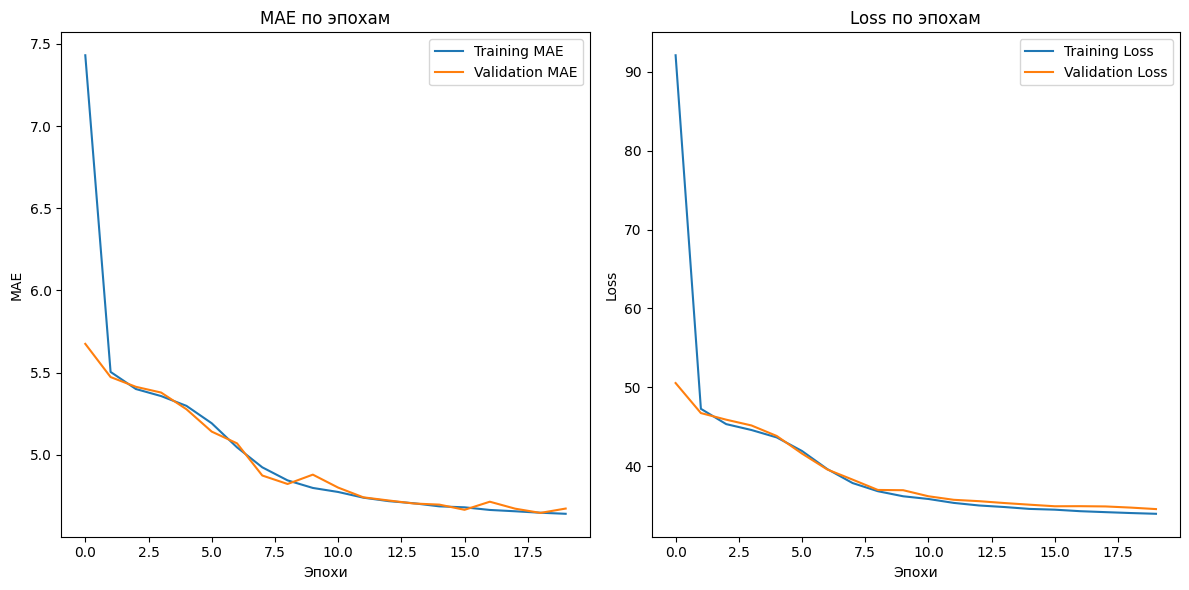

In [ ]:
plt.figure(figsize=(12, 6))

# График средней абсолютной ошибки на обучающем и валидационном наборе
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()

# График потерь на обучающем и валидационном наборе
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

На полученных графиках можно заметить, что с увеличением количества эпох - метрики Loss и MAE начинают расти медленнее. Оптимальное количество эпох - 10.

Нахождение оптимального количества скрытых слоев нейорнной сети.

Количество слоев: 1, Training MAE: 4.6998, Validation MAE: 4.6688, Training Loss: 34.6897, Validation Loss: 35.0981
Количество слоев: 2, Training MAE: 4.6626, Validation MAE: 4.6669, Training Loss: 34.2465, Validation Loss: 34.6340
Количество слоев: 3, Training MAE: 4.6203, Validation MAE: 4.6613, Training Loss: 33.8354, Validation Loss: 34.4820
Количество слоев: 4, Training MAE: 4.6183, Validation MAE: 4.6371, Training Loss: 33.7892, Validation Loss: 34.4337
Количество слоев: 5, Training MAE: 4.5577, Validation MAE: 4.6030, Training Loss: 33.0949, Validation Loss: 34.0300
Количество слоев: 6, Training MAE: 4.5669, Validation MAE: 4.5882, Training Loss: 33.1723, Validation Loss: 34.4678
Количество слоев: 7, Training MAE: 4.5556, Validation MAE: 4.6879, Training Loss: 33.1432, Validation Loss: 34.4810
Количество слоев: 8, Training MAE: 4.5775, Validation MAE: 4.6708, Training Loss: 33.3735, Validation Loss: 34.1833
Количество слоев: 9, Training MAE: 4.5503, Validation MAE: 4.5227, Train

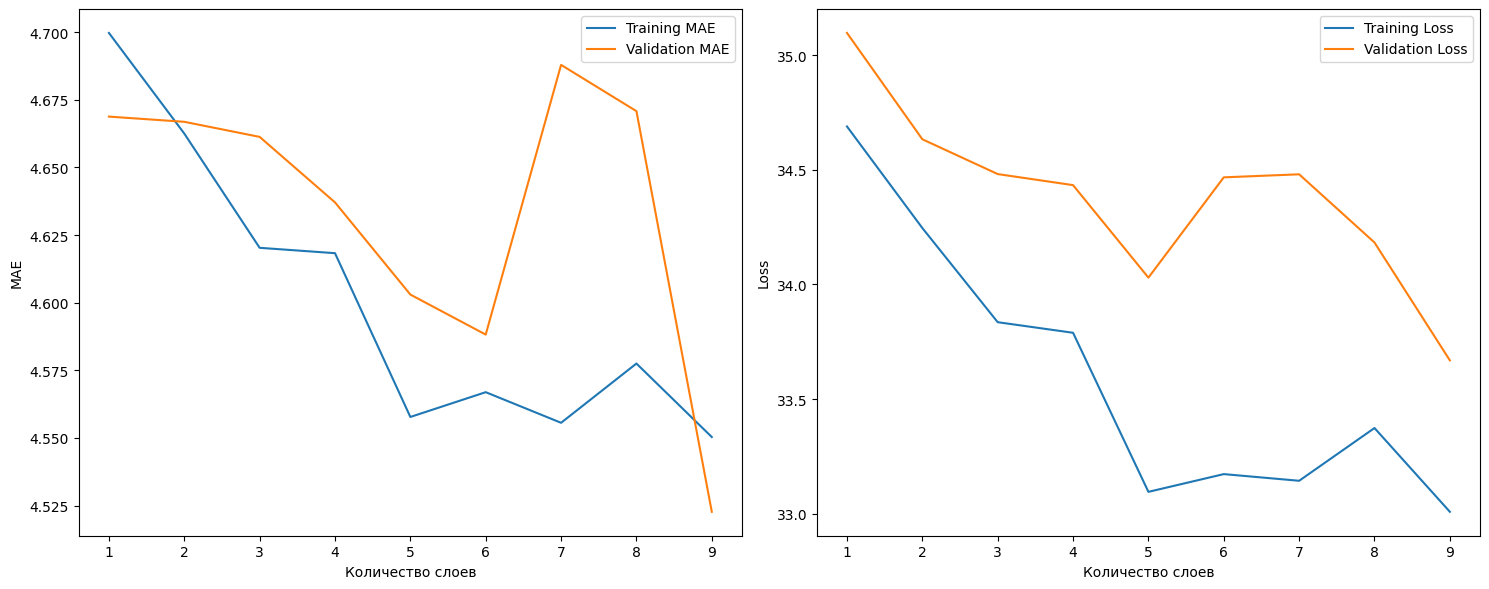

In [ ]:
results = []
for num_layers in range(1, 10):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(32, activation='relu'))

    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), verbose=0)

    results.append({
        'num_layers': num_layers,
        'train_loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1],
        'train_mae': history.history['mae'][-1],
        'val_mae': history.history['val_mae'][-1]
    })

for result in results:
    print(f"Количество слоев: {result['num_layers']}, Training MAE: {result['train_mae']:.4f}, Validation MAE: {result['val_mae']:.4f}, Training Loss: {result['train_loss']:.4f}, Validation Loss: {result['val_loss']:.4f}")

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot([result['num_layers'] for result in results], [result['train_mae'] for result in results], label='Training MAE')
plt.plot([result['num_layers'] for result in results], [result['val_mae'] for result in results], label='Validation MAE')
plt.xlabel('Количество слоев')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([result['num_layers'] for result in results], [result['train_loss'] for result in results], label='Training Loss')
plt.plot([result['num_layers'] for result in results], [result['val_loss'] for result in results], label='Validation Loss')
plt.xlabel('Количество слоев')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

На основе полученных данных можно прийти к выводу, что оптимальное количество слоев для задачи - 7 (так как при этом количестве минимальный MAE и Loss), однако различия минимальны и пренебрежимы для данной задачи.

# Часть 2

Датасет содержит информацию:
1. Возраст пациента
2. Пол пациента
3. Общий билирубин
4. Прямой билирубин
5. Щелочная фосфатаза
6. Аламиноаминотрансфераза
7. Аспартатаминотрансфераза
8. Всего белков
9. Альбумин
10. Соотношение альбуминов и глобулинов
11. Целевая переменная: пациент с заболеванием печени или без заболевания

Чтение CSV файла и вывод первых 10 строк датасета

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2liver.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


Переименование столбцов TotalBilirubin и Dataset123 в Total_Bilirubin и Is_Liver_Disease

In [ ]:
df = df.rename(columns={'TotalBilirubin' : 'Total_Bilirubin', 'Dataset123' : 'Is_Liver_Disease'})

Удаление всех NaN значений и явных дубликатов

In [ ]:
df = df.dropna()
df = df.drop_duplicates()

Поиск неявных дубликатов в столбцах Gender, Is_Livery_Disease, Aspartate_Aminotransferase. Поиск производится в данных столабцах так как неявные дубликаты не могут присутствовать в числовых столбцах.

In [ ]:
display(df['Gender'].unique())
display(df['Is_Liver_Disease'].unique())
display(df['Aspartate_Aminotransferase'].unique())

array(['Female', 'Male', 'Mal'], dtype=object)

array(['1', '2', 'yes'], dtype=object)

array(['18', '100', '68', '20', '59', '14', '12', '11', '19', '58', '56',
       '30', '41', '53', '441', '23', '245', '28', '34', '66', '55', '45',
       '731', '850', '21', '111', '44', '57', '80', '36', '77', '73',
       '50', '110', '47', '576', '15', '178', '27', '960', '406', '150',
       '61', '54', '24', '16', '43', '97', '86', '88', '95', '26', '17',
       '397', '29', '22', '127', '79', '142', '152', '31', '3a4', '350',
       '794', '400', '202', '630', '950', '161', '405', '92', '39', '10',
       '116', '98', '285', '64', '149', '2946', '1600', '1050', '275',
       '113', '84', '25', '40', '83', '65', '4929', '90', '140', '139',
       '87', '38', '42', '233', '138', '82', '35', '32', '187', '62',
       '74', '67', '37', '602', '63', '99', '103', '145', '247', '114',
       '104', '51', '60', '1500', '180', '148', '46', '13', '85', '231',
       '156', '89', '298', '48', '130', '75', '500', '105', '250', '232',
       '33', '143', '176', '70', '52', '91', '236', '108



Исправление неявных дубликатов, а именно замена:

* Mal в столбце Gender на Male
* yes в столбце Is_Liver_Disease на 1



In [ ]:
df['Gender'] = df['Gender'].replace('Mal', 'Male')
df['Is_Liver_Disease'] = df['Is_Liver_Disease'].replace('yes', '1')
display(df['Gender'].unique())
display(df['Is_Liver_Disease'].unique())

array(['Female', 'Male'], dtype=object)

array(['1', '2'], dtype=object)

Конвертация типа Is_Liver_Disease и Aspartate_Aminotransferase в int, удаление NaN - значений

In [ ]:
df['Is_Liver_Disease'] = df['Is_Liver_Disease'].astype('int')
df['Aspartate_Aminotransferase'] = pd.to_numeric(df['Aspartate_Aminotransferase'], errors='coerce')
df = df.dropna()
df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         564 non-null    int64  
 1   Gender                      564 non-null    object 
 2   Total_Bilirubin             564 non-null    float64
 3   Direct_Bilirubin            564 non-null    float64
 4   Alkaline_Phosphotase        564 non-null    float64
 5   Alamine_Aminotransferase    564 non-null    int64  
 6   Aspartate_Aminotransferase  564 non-null    int64  
 7   Total_Protiens              564 non-null    float64
 8   Albumin                     564 non-null    float64
 9   Albumin_and_Globulin_Ratio  564 non-null    float64
 10  Is_Liver_Disease            564 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 52.9+ KB


Выделение целевой переменной

In [ ]:
X = df.drop('Is_Liver_Disease', axis=1)
y = df['Is_Liver_Disease']

Преобразование категориальных переменных

In [ ]:
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])

Разделение на обучающий и тестовый наборы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

Стандартизация данных

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(451, 10)

Создание модели

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Информация о модели

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 16)                176       
                                                                 
 dense_67 (Dense)            (None, 1)                 17        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компиляция модели

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Обучение модели

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test), verbose = 1)

Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 0.5144 - accuracy: 0.4080 - val_loss: 0.4199 - val_accuracy: 0.4956
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4435 - accuracy: 0.4324 - val_loss: 0.3605 - val_accuracy: 0.5398
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3789 - accuracy: 0.4989 - val_loss: 0.3059 - val_accuracy: 0.5841
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3172 - accuracy: 0.5521 - val_loss: 0.2537 - val_accuracy: 0.6283
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.6009 - val_loss: 0.2049 - val_accuracy: 0.6814
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2061 - accuracy: 0.6386 - val_loss: 0.1594 - val_accuracy: 0.7257
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1549 - accuracy: 0.6785 - val_loss: 0.1153 - val_accuracy: 0.7345
Epoch 8/50
8/8 [=================

Построение графика accuracy (точности) по эпохам

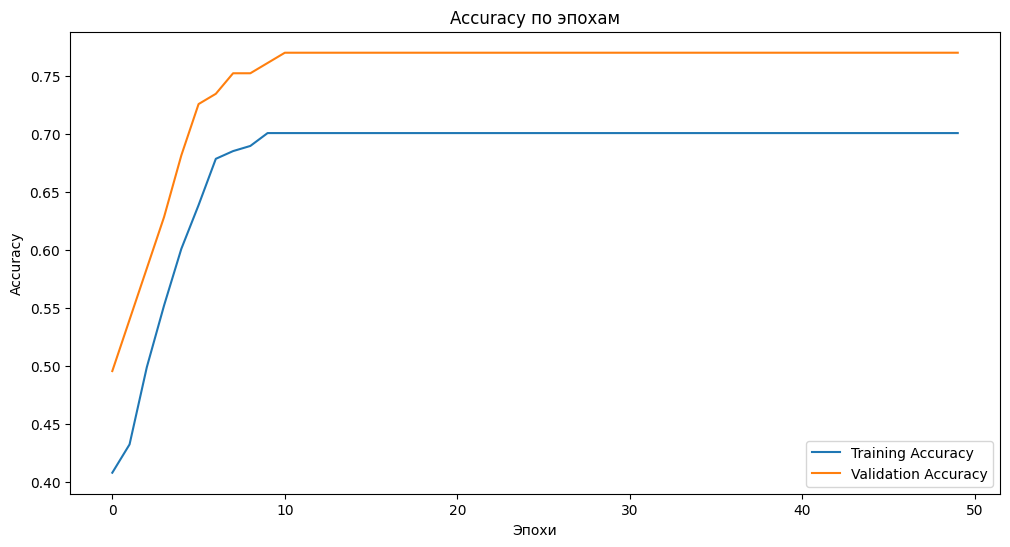

In [ ]:
plt.figure(figsize=(12, 6))

# График потерь на обучающем и валидационном наборе
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()

На основе полученного графика можно сделать вывод, что для данной задачи при увеличении количества эпох точность предсказаний также увеличивается до 20 эпохи, после чего нейронная сеть практически полностью перестает обучаться.

In [ ]:
y_pred_prob = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


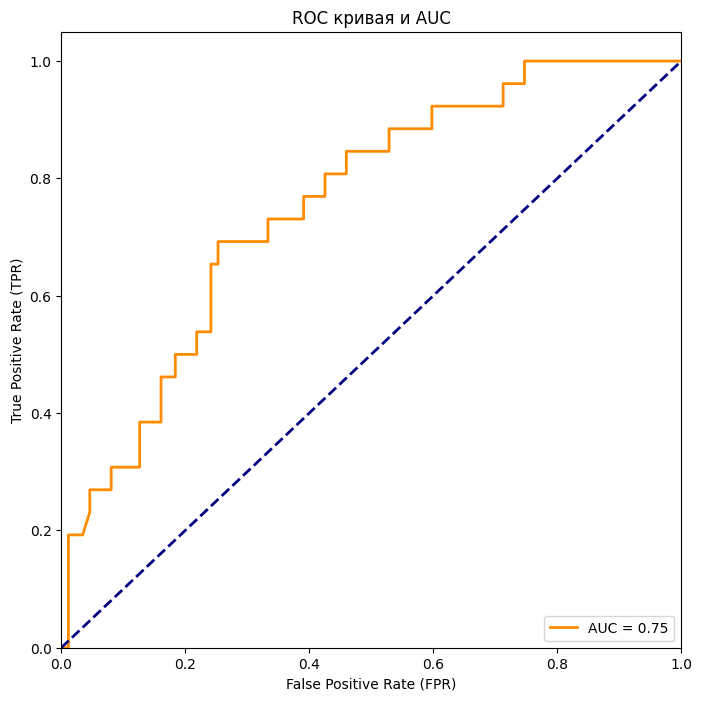

In [ ]:
# Вычисление FPR, TPR
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=2)

# Вычисление площади под ROC-кривой (AUC)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC кривая и AUC')
plt.legend(loc='lower right')
plt.show()

# Доп. задание

Сравнение метрик качество нейронной сети в зависимости от различного количества нейронов в каждом слое

Нейроны в слое: 16, Validation MAE: 0.8123, Validation Loss: 1.4420
Нейроны в слое: 32, Validation MAE: 1.9221, Validation Loss: 4.5104
Нейроны в слое: 64, Validation MAE: 0.6143, Validation Loss: 0.8486
Нейроны в слое: 128, Validation MAE: 0.4689, Validation Loss: 0.3667
Нейроны в слое: 256, Validation MAE: 0.6054, Validation Loss: 0.7480


<ipython-input-51-2622a1048f58>:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


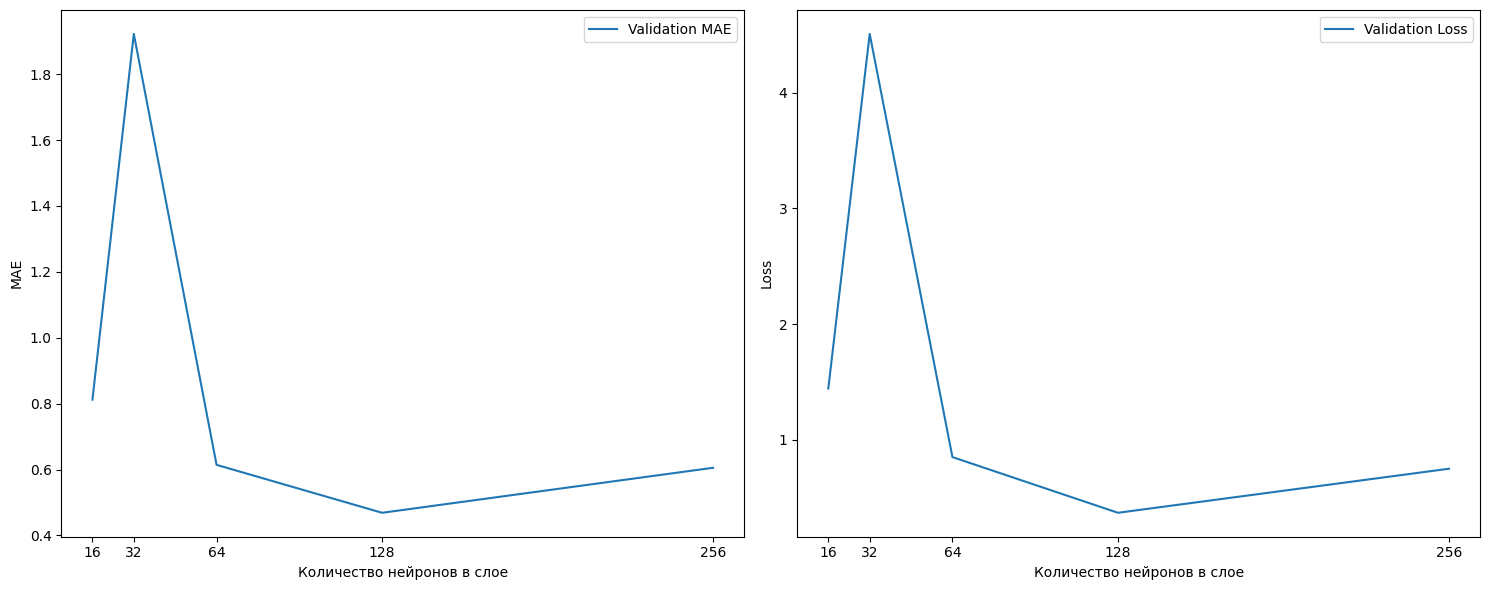

In [ ]:
results = []

# Измененный диапазон для количества нейронов в слое
neurons_per_layer_options = [16, 32, 64, 128, 256]

for neurons_per_layer in neurons_per_layer_options:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons_per_layer, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(7):
          model.add(tf.keras.layers.Dense(neurons_per_layer, activation='relu'))

    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), verbose=0)

    results.append({
            'neurons_per_layer': neurons_per_layer,
            'val_loss': history.history['val_loss'][-1],
            'val_mae': history.history['val_mae'][-1]
      })

# Вывод результатов
for result in results:
    print(f"Нейроны в слое: {result['neurons_per_layer']}, "
          f"Validation MAE: {result['val_mae']:.4f}, "
          f"Validation Loss: {result['val_loss']:.4f}")

# Построение графиков
plt.figure(figsize=(15, 6))
plt.title('Зависимость метрик качества от количества нейронов в каждом слое')

plt.subplot(1, 2, 1)
plt.plot([i['neurons_per_layer'] for i in results], [i['val_mae'] for i in results], label='Validation MAE')
plt.xticks([i['neurons_per_layer'] for i in results])

plt.xlabel('Количество нейронов в слое')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i['neurons_per_layer'] for i in results], [i['val_loss'] for i in results], label='Validation Loss')
plt.xticks([i['neurons_per_layer'] for i in results])

plt.xlabel('Количество нейронов в слое')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

На основе полученных графиков и численных результатов можно прийти к выводу:

*  Оптимальное количество нейронов для задачи предсказания погоды на основе данного датасета - 128.




Оптимизатор: adam, Validation MAE: 0.6434, Validation Loss: 0.6699
Оптимизатор: rmsprop, Validation MAE: 0.8993, Validation Loss: 1.0375
Оптимизатор: Adamax, Validation MAE: 0.5832, Validation Loss: 0.5799
Оптимизатор: Adagrad, Validation MAE: 0.5241, Validation Loss: 0.5032


<ipython-input-56-fcde69f9d720>:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


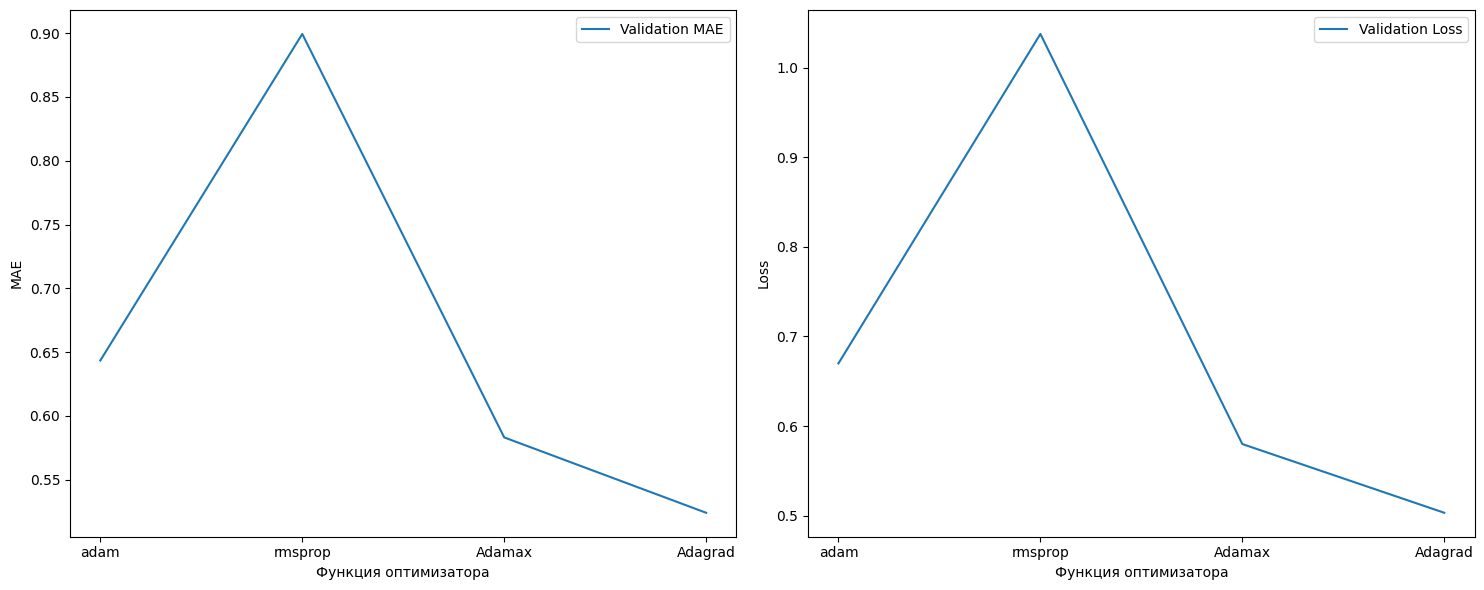

In [ ]:
results = []

# Различные функции оптимизаторов
optimizer_options = ['adam', 'rmsprop', 'Adamax', 'Adagrad']

for optimizer in optimizer_options:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(7):
        model.add(tf.keras.layers.Dense(128, activation='relu'))

    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), verbose=0)

    results.append({
        'optimizer': optimizer,
        'val_loss': history.history['val_loss'][-1],
        'val_mae': history.history['val_mae'][-1]
    })

# Вывод результатов
for result in results:
    print(f"Оптимизатор: {result['optimizer']}, "
          f"Validation MAE: {result['val_mae']:.4f}, "
          f"Validation Loss: {result['val_loss']:.4f}")

# Построение графиков
plt.figure(figsize=(15, 6))
plt.title('Зависимость метрик качества от функции оптимизатора')

plt.subplot(1, 2, 1)
plt.plot([i['optimizer'] for i in results], [i['val_mae'] for i in results], label='Validation MAE')
plt.xlabel('Функция оптимизатора')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i['optimizer'] for i in results], [i['val_loss'] for i in results], label='Validation Loss')
plt.xlabel('Функция оптимизатора')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

На основе полученных графиков и числовых значений метрик можно прийти к выводу:
*  Оптимальная функция оптимизации для задачи предсказания погоды на основе данного датасета - Adagrad.

# Вывод

В ходе лабораторной работы были изучены простые полносвязные нейронные сети, а именно нейронные сети для выполнения задач классификации и регрессии.

С помощью библиотеки TensorFlow была создана нейронная сеть, способная предсказывать температуру в городе Szeged, основываясь на скорости ветра, влажности, видимости и давлении.

Также, аналогчино была создана нейросеть-классификатор, способная определять болезнь печени у людей.

На основе проведенных исследований, было установлено:

*   Нейронные сети представляют собой удобный способ нахождения зависимостей между данными и выполения предсказаний на основе уже известной информации.

* Нейронные сети могут быть применены в различных индустриях (медицина, наука)
